### 기술통계 > 기초통계랑

#### 01. 기술통계

#01. 기술통계
기술통계란 자료를 그래프나 숫자 등으로 요약하는 통계적 행위 및 간련 방법을 의미

데이터의 분석에 앞서 전체적으로 데이터의 특징을 파악하고 데이터를 다양한 각도로 접근한다.

#### (1) 데이터의 전체 크기와 형태 확인

-행과 열의 수를 확인한다.<br>
-상위 하위 n개의 데이터 추출 및 확인

#### (2) 수치형 데이터

2_1. 집단의 특성을 잘 나타내는 요약 통계량을 확인한다.<br>
-평균, 중앙값 등등 확인한다.<br>
-요약통계량 -> 박스플롯

2_2. 전체 데이터의 분포를 확인한다.<br>
-도수분포표, 히스토그램

#### (3) 범주형 데이터
-데이터의 빈도수를 확인한다

#### 02.작업준비

#### (1) 패키지 참조

In [2]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn

In [6]:
D=pd.read_excel("https://data.hossam.kr/D02/ad-sales.xlsx",index_col="월")
data=pd.DataFrame(D)

#### 03. 기초통계량


#### (1) 사분위수
데이터 표본을 4등분 한것.

용어|설명
---|----
Q1|데이터의 하위 25%가 이 값보다 작거나 같음
Q2|중위수 데이터의 50%가 이 값보다 작거나 같음
Q3|데이터의 하위 75%가 이 값보다 작거나 같음
IQR|Q3-Q1

>실제 구하는 방법(광고비 기준)

In [10]:
for t in [0.25,0.5,0.75]:
    print("Q"+f"{[0.25,0.5,0.75].index(t)+1} :",data["광고비(백만원)"].quantile(t))

Q1 : 121.75
Q2 : 140.5
Q3 : 188.5


In [14]:
print("IQR : ",(data["광고비(백만원)"].quantile(0.75))-(data["광고비(백만원)"].quantile(0.25)))

IQR :  66.75


#### 기초통계량 일괄산출

In [17]:
pd.DataFrame(data.describe()).T

,count,mean,std,min,25%,50%,75%,max
광고비(백만원),12.0,147.333333,62.542107,2.0,121.75,140.5,188.5,237.0
매출액(억원),12.0,538.166667,428.774540,100.0,273.50,425.0,652.5,1690.0


>시각화

In [25]:
import matplotlib.pyplot as plt
import statsmodels.graphics.mosaicplot as msc
import pandas as pd
import seaborn as sb
import numpy as np
plt.rcParams["font.family"] = 'BM YEONSUNG'
#plt.rcParams["font.family"] = 'AppleGothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

>일괄생성

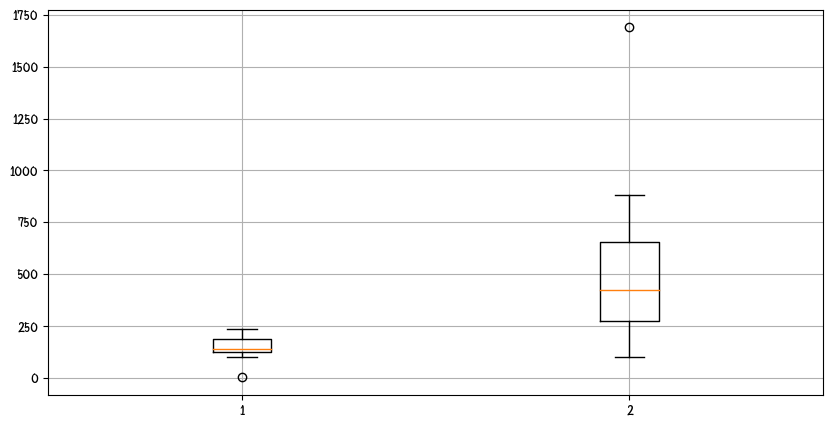

In [26]:
plt.figure()
plt.grid() #먼저 쓰셈
plt.boxplot(data)
plt.show()

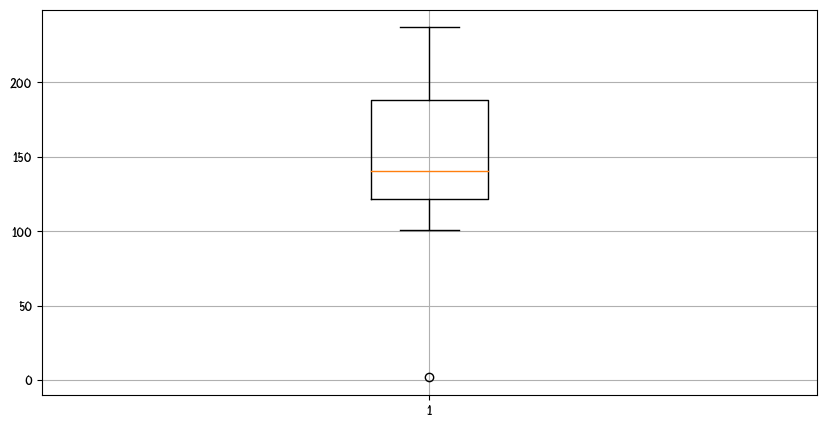

In [27]:
plt.figure()
plt.grid() #먼저 쓰셈
plt.boxplot(data["광고비(백만원)"])
plt.show()

>Seaborn을 이용할수도 있음

In [30]:
plt.rcParams["figure.figsize"] = (5, 5)

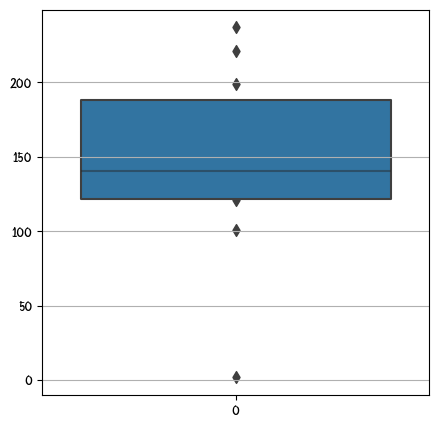

In [31]:
plt.figure()
plt.grid() #먼저 쓰셈
sb.boxenplot(data["광고비(백만원)"])
plt.show()

In [ ]:
plt.figure()
plt.grid() #먼저 쓰셈
sb.boxenplot(data=data,orient="광고비(백만원)",)
plt.show()

#### 4. 극단치 경계

데이터가 극단적으로 크거나 작으면 극단치(==이상치)라고 한다.

>$IQP=Q3-Q1$

$Q3+IQR*1.5$ : 상단 극단치<br>
$Q1-IQR*1.5$ : 하단 극단치

#### 직접구해보자

In [37]:
q3,q1=data["광고비(백만원)"].quantile(0.75),data["광고비(백만원)"].quantile(0.25)

In [38]:
up=q3+(q3-q1)*(0.15)
down=q1-(q3-q1)*(0.15)

In [43]:
idx=data["광고비(백만원)"]>up
idx2=data["광고비(백만원)"]<down

In [51]:
data["광고비(백만원)"][idx|idx2]

월
1월       2
7월     101
8월     199
9월     221
12월    237
Name: 광고비(백만원), dtype: int64

In [47]:
up,down

(198.5125, 111.7375)